In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
aisles_df= pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 1/InstaCart/aisles.csv')
departments_df=pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 1/InstaCart/departments.csv')
order_products_prior_df=pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 1/InstaCart/order_products__prior.csv')
order_products_train_df=pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 1/InstaCart/order_products__train.csv')
orders_df=pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 1/InstaCart/orders.csv')
products_df=pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 1/InstaCart/products.csv')


In [4]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Now we'll clean the data and look at the missing values in each data set. 


In [10]:
len(orders_df)

3421083

# Data Cleaning

In [11]:
#checking for missing values
total=orders_df.isnull().sum()
total

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [12]:
#checking for the percentage
percentage=total/orders_df.isnull().count()
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [13]:
missing_value_table_orders = pd.concat([total,percentage],keys=['Total','Percentage'],axis=1)
missing_value_table_orders

,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


We can see that only 6% of days_since_prior_order column is null. So we can exclude them and use the data.

In [14]:
orders_new=orders_df[orders_df['days_since_prior_order'].notnull()]
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


Similarly, we check for missing values for all the other 5 data sets to clean the data.

In [15]:
#aisles
total_a=aisles_df.isnull().count()
total_a

aisle_id    134
aisle       134
dtype: int64

In [16]:
percentage_a=total_a/aisles_df.isnull().count()
percentage_a

aisle_id    1.0
aisle       1.0
dtype: float64

In [17]:
missing_value_table_aisles = pd.concat([total_a,percentage_a],keys=['Total','Percentage'],axis=1)
missing_value_table_aisles

,Total,Percentage
aisle_id,134,1.0
aisle,134,1.0


In [18]:
#departments
total_d=departments_df.isnull().sum()
total_d

department_id    0
department       0
dtype: int64

In [19]:
percentage_d=total_d/departments_df.isnull().count()
percentage_d

department_id    0.0
department       0.0
dtype: float64

In [20]:
missing_value_table_departments = pd.concat([total_d,percentage_d],keys=['Total','Percentage'],axis=1)
missing_value_table_departments

,Total,Percentage
department_id,0,0.0
department,0,0.0


In [21]:
#orders_prior
total_order_p_p=order_products_prior_df.isnull().sum()
total_order_p_p

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [22]:
percentage_order_p_p=total_order_p_p/order_products_prior_df.isnull().count()
percentage_order_p_p

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [23]:
missing_value_table_order_p_p = pd.concat([total_order_p_p,percentage_order_p_p],keys=['Total','Percentage'],axis=1)
missing_value_table_order_p_p

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [24]:
#order_train
total_order_train=order_products_train_df.isnull().sum()
total_order_train

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [25]:
percentage_order_train=total_order_train/order_products_train_df.isnull().count()
percentage_order_train

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [26]:
missing_value_table_order_train = pd.concat([total_order_train,percentage_order_train],keys=['Total','Percentage'],axis=1)
missing_value_table_order_train

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [27]:
#products
total_products=products_df.isnull().sum()
total_products

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [28]:
percentage_products=total_products/products_df.isnull().count()
percentage_products

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [29]:
missing_value_table_products = pd.concat([total_products,percentage_products],keys=['Total','Percentage'],axis=1)
missing_value_table_products

,Total,Percentage
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0


Looking at the other 5 data sets we see that there are no missing values and hence conclude the data cleaning process.

# Exploratory Data Analysis & Data Visualization

We now try to get the count of the three evaluation set prior,train and test and then plot them to get an idea about the distribution.

In [30]:
count=orders_df['eval_set'].value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

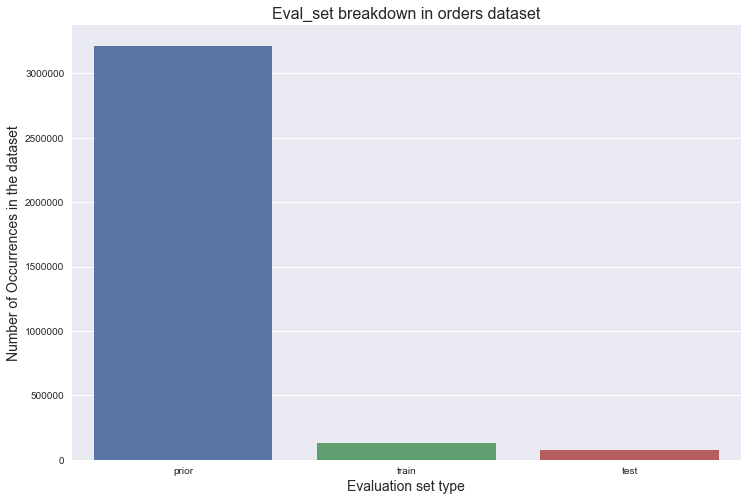

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Eval_set breakdown in orders dataset', fontsize=16)

From the above graph we can see that that test evaluation as 75000 samples on which we will obtain predictions. Now let's see the distribution with respect to the hour of the day

In [32]:
count_hour_of_day=orders_df['order_hour_of_day'].value_counts()
count_hour_of_day

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

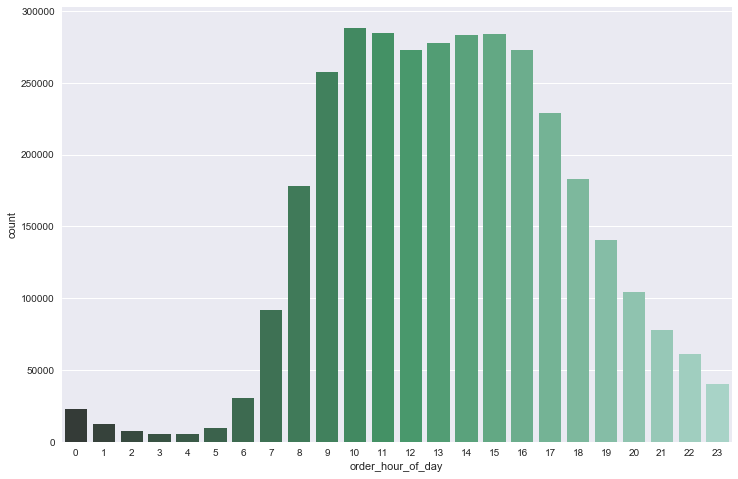

In [33]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day", data=orders_df,palette='BuGn_d')

From the graph above we can see that the maximum number of orders is around 10 and 11AM followed by 3-4PM which makes sense since morning is the time before lunch and dinner. On the other hand the orders are least at 3-4AM since that's the time people are asleep. Now, in order to know more. let's see how the orders vary across different days of the week.

In [34]:
count_dow=orders_df['order_dow'].value_counts()
count_dow

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

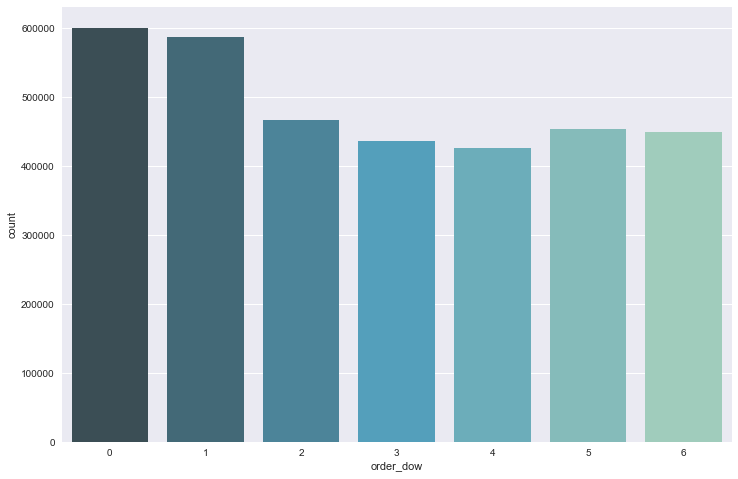

In [35]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_dow", data=orders_df,palette='GnBu_d')

From this graph we can see that, the number of orders is maximum on Sunday and Monday which makes sense since people want to shop for groceries either at the start of the week or in the weekend. On the other hand, it's least in the middle of the week which is thursday followed by wednesday. Now to know more, let's look at the orders with respect to the hours on a given day of the week.

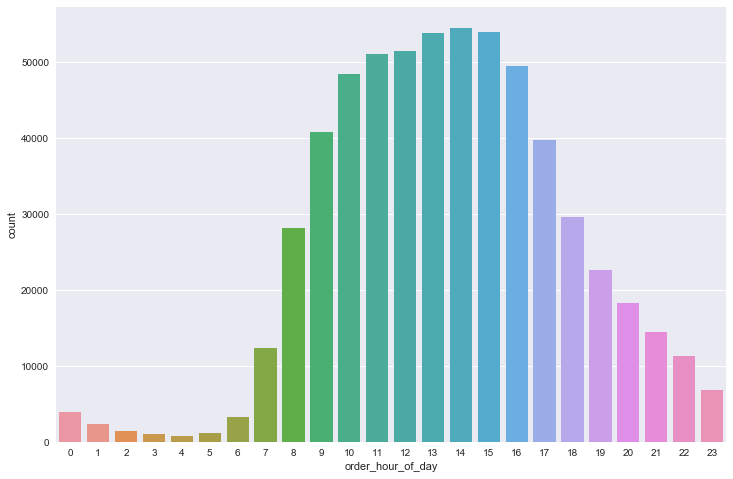

In [36]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==0])

This is the plot of orders on Sunday. We can see that maximum number of orders are placed around 2-3pm. similarly, let's look at the orders by hour distribution for the rest of the days to get an idea about weekend vs weekdays patterns.

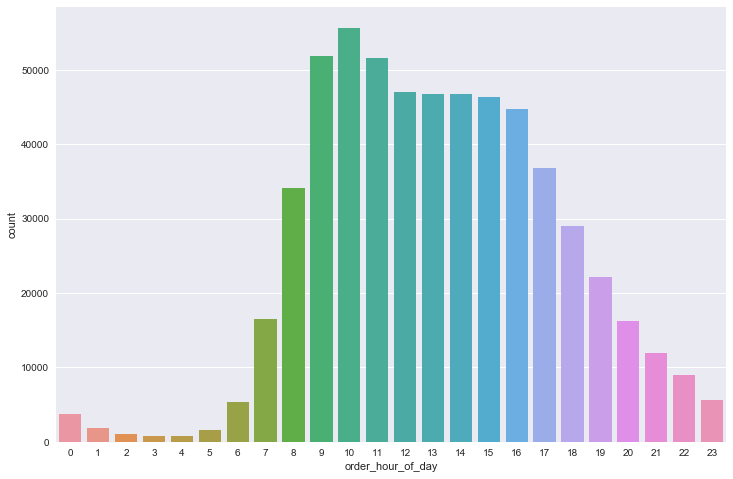

In [37]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==1])

So on monday, the peak is reached at 10AM. So most of the orders are placed in the morning on Monday from 9-11AM. Followed by 12-3pm.

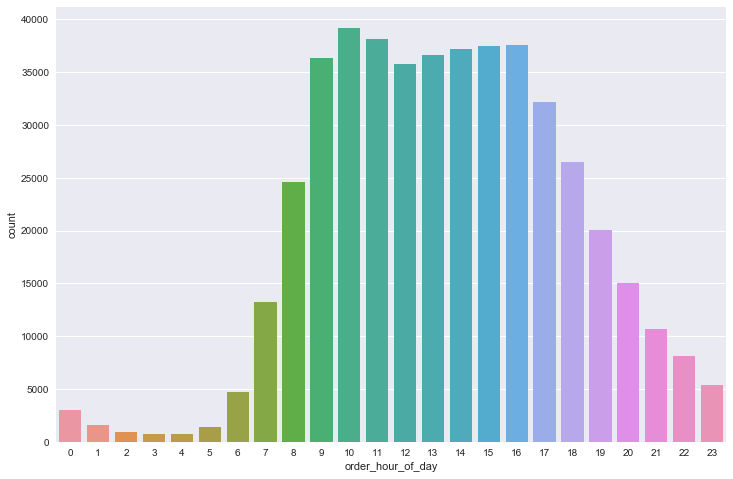

In [38]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==2])

Tuesday also pretty much follows the same trend as Monday. Having most orders in the morning from 10-11AM.

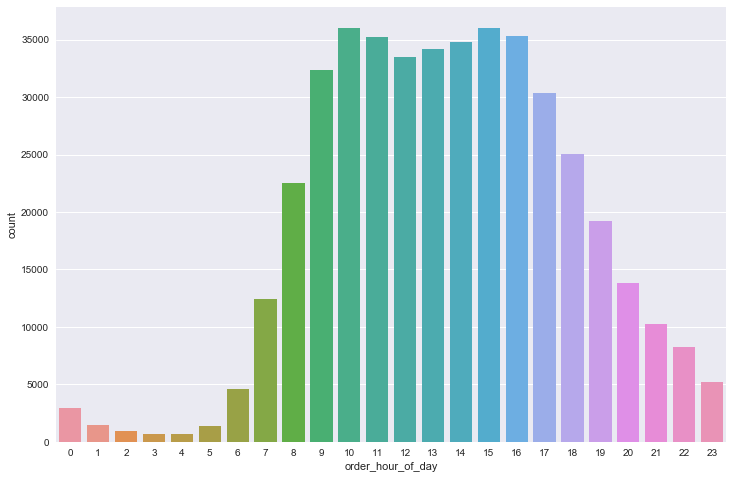

In [39]:
#wednesday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==3])

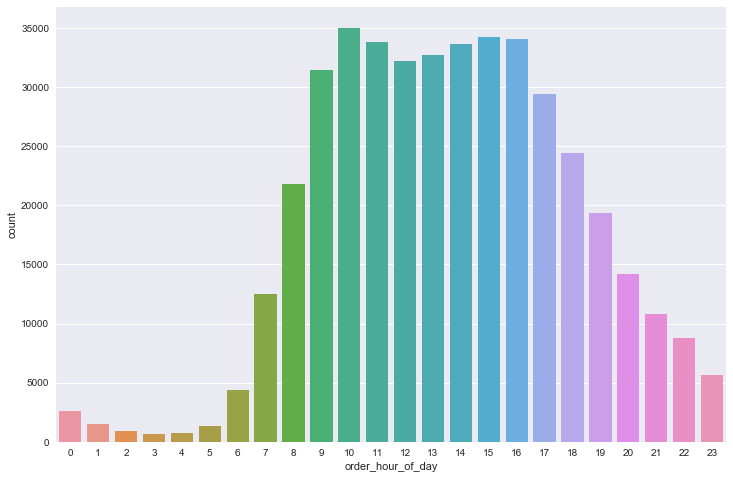

In [40]:
#thursday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==4])

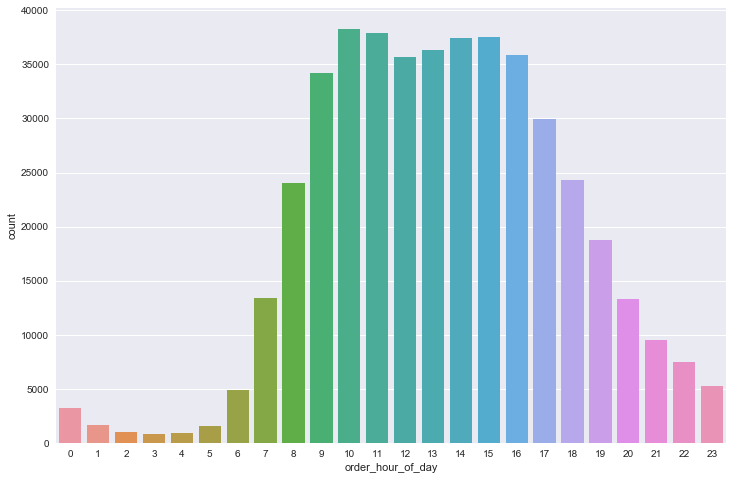

In [41]:
#friday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==5])

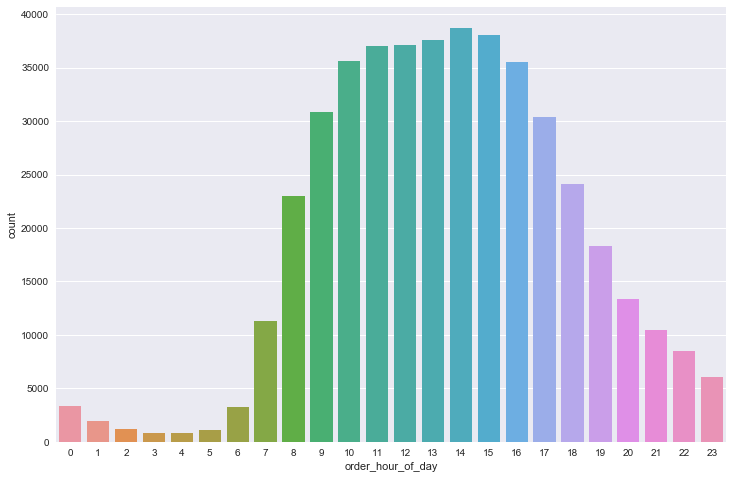

In [42]:
#saturday
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders_df[orders_df['order_dow']==6])

The graphs for wednesday,Thursday and Friday pretty much follow the trend for Monday and Tuesday. But in the above graph for Saturday, the peak times is in the afternoon around 2-3pm. So we can see that, during the weekends, peak orders are in the afternoon from 2-4pm whereas in the weekdays, it's in the morning from 10AM-12PM.

Now, let's get the orders in terms of hour of the day and day of the week in a single dataset by using the groupby option for better visualization.

In [43]:
grouped_orders = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_orders

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
5,0,5,1168
6,0,6,3329
7,0,7,12410
8,0,8,28108
9,0,9,40798


In [44]:
grouped_orders.head()

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [45]:
#pivoting the table for clarity
grouped_orders = grouped_orders.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_orders

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


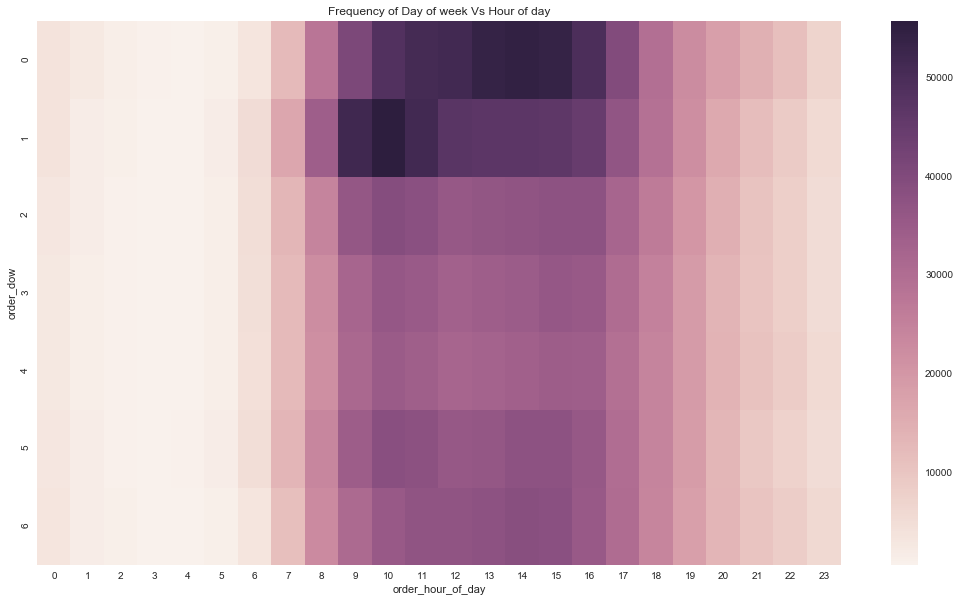

In [46]:
plt.figure(figsize=(18,10))
sns.heatmap(grouped_orders)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

From the above heatmap, we can see that peak orders are in the afternoon on Sunday and Monday, from 9AM-4PM.

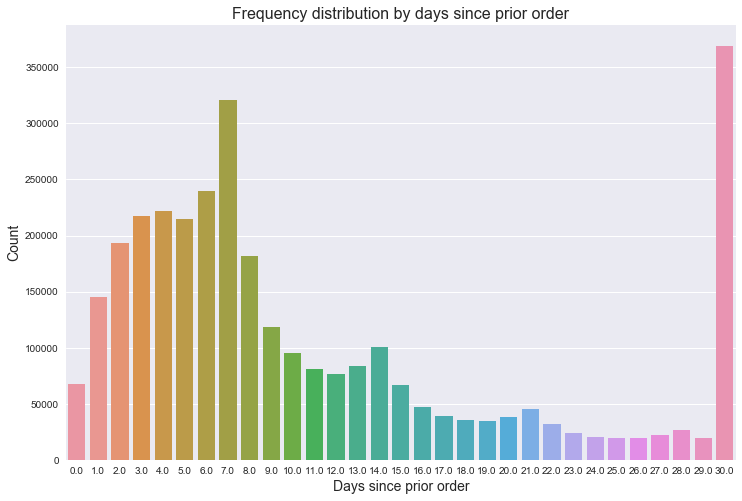

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution by days since prior order", fontsize=16)
plt.show()

From this plot we can see that 7th day is where we have a spike, and then a relative small peak at days 14,21 and 28 which indicates that every 7 days or weekly is the order frequency. And then again there's a huge peak at the end of the month indicating that there's a monthly peak.

In [48]:
# percentage of re-orders in orders_products_prior
order_products_prior_df.reordered.sum() / len(order_products_prior_df)

0.5896974667922161

Approximately 59% of the products are re-ordered from the prior dataset

In [49]:
# percentage of re-orders in orders_products_train
order_products_train_df.reordered.sum() / len(order_products_train_df)

0.5985944127509629

Approximately 60% of the products are re-ordered from the train dataset

In [50]:
#merging order_products_prior and products
op_prior_merged = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')


In [51]:
#merging op_merged with aisles
op_prior_merged = pd.merge(op_prior_merged, aisles_df, on='aisle_id', how='left')

In [67]:
#merging the new op_prior_merged with departments
op_prior_merged= pd.merge(op_prior_merged, departments_df, on='department_id', how='left')

In [72]:
#let's see the new op_merged
op_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department_y,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,pantry


In [73]:
del op_prior_merged['department_y']
op_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [97]:
count_products = op_prior_merged['product_name'].value_counts().reset_index().head(20)
count_products.columns=['product_name','frequency']

In [98]:
count_products

,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


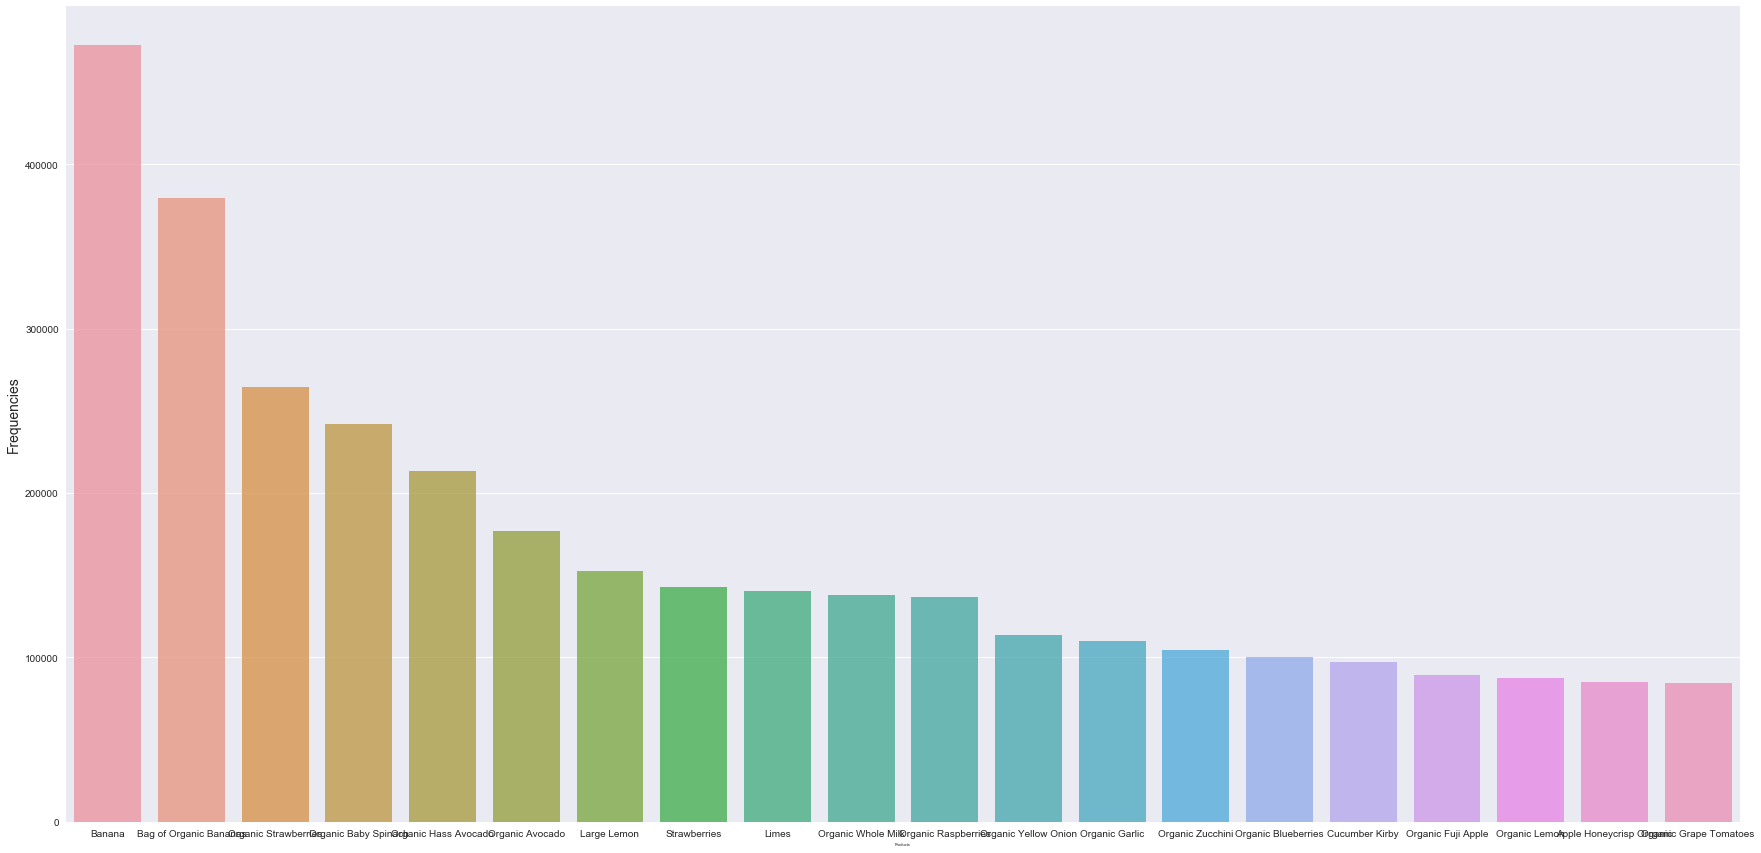

In [101]:
plt.figure(figsize=(30,15))
sns.barplot(count_products.product_name, count_products.frequency, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Products', fontsize=4)
plt.show()

From this graph, the product that is most ordered are fruits like bananas, strawberries and organic products.

In [58]:
count_aisles = op_prior_merged['aisle'].value_counts().head(20)
count_aisles

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

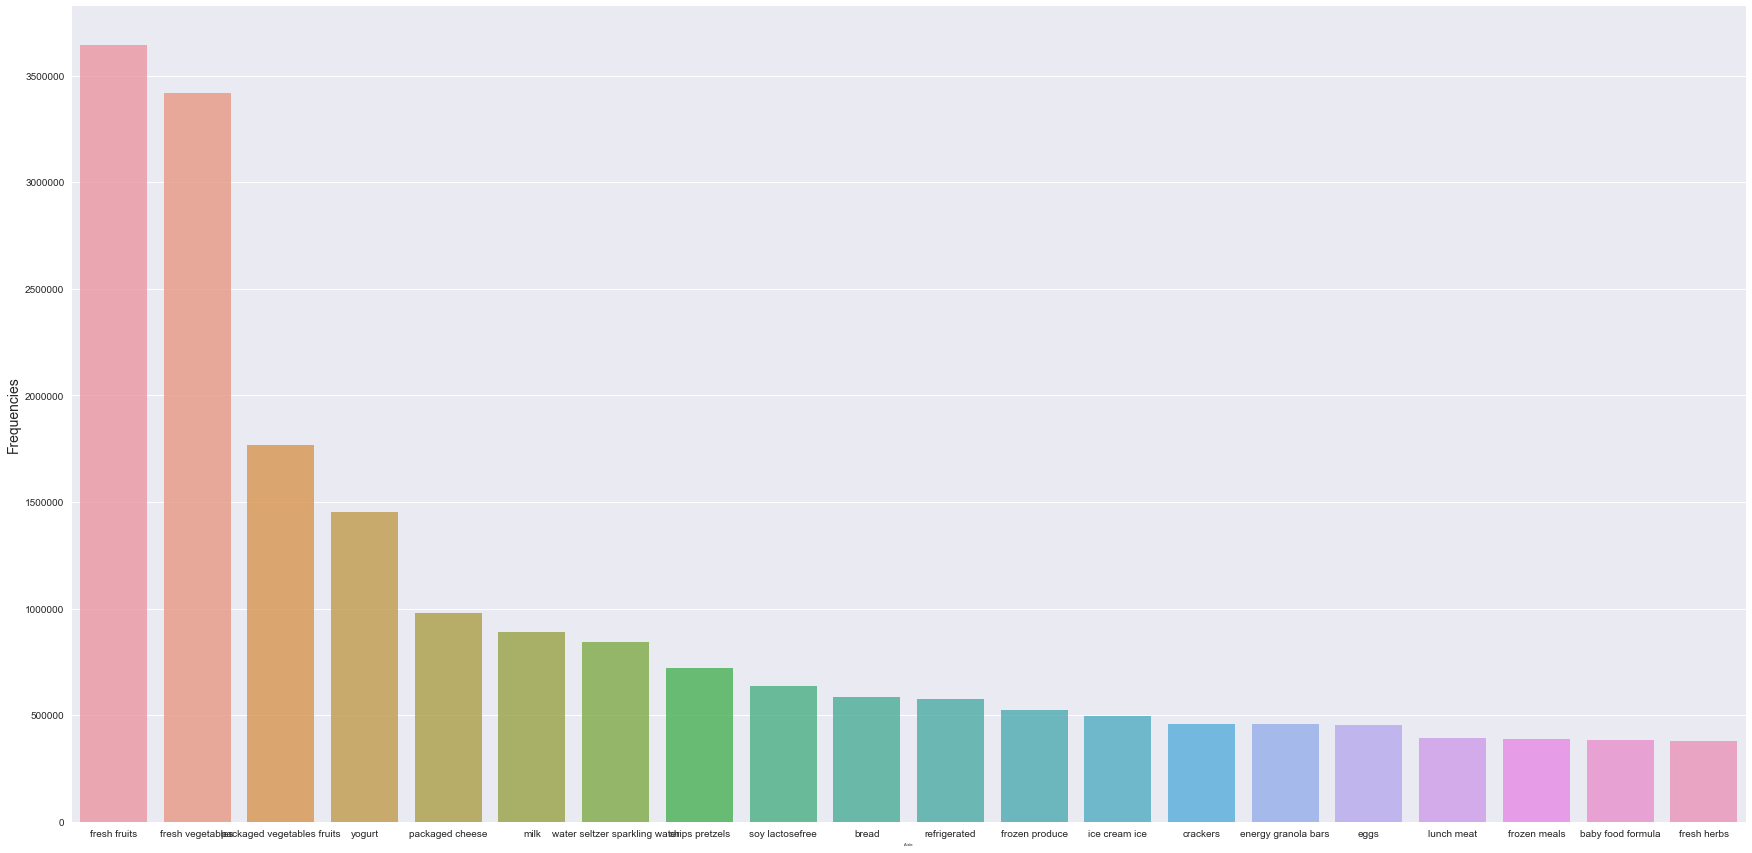

In [61]:
plt.figure(figsize=(30,15))
sns.barplot(count_aisles.index, count_aisles.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Aisle', fontsize=4)
plt.show()

From this graph we can see that the fresh food and fresh vegetables aisles are the most frequently visited. We can do the same analysis for department and also check the reordered items against day of the week and the hour of the day.

In [75]:
count_dept = op_prior_merged['department'].value_counts()
count_dept

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

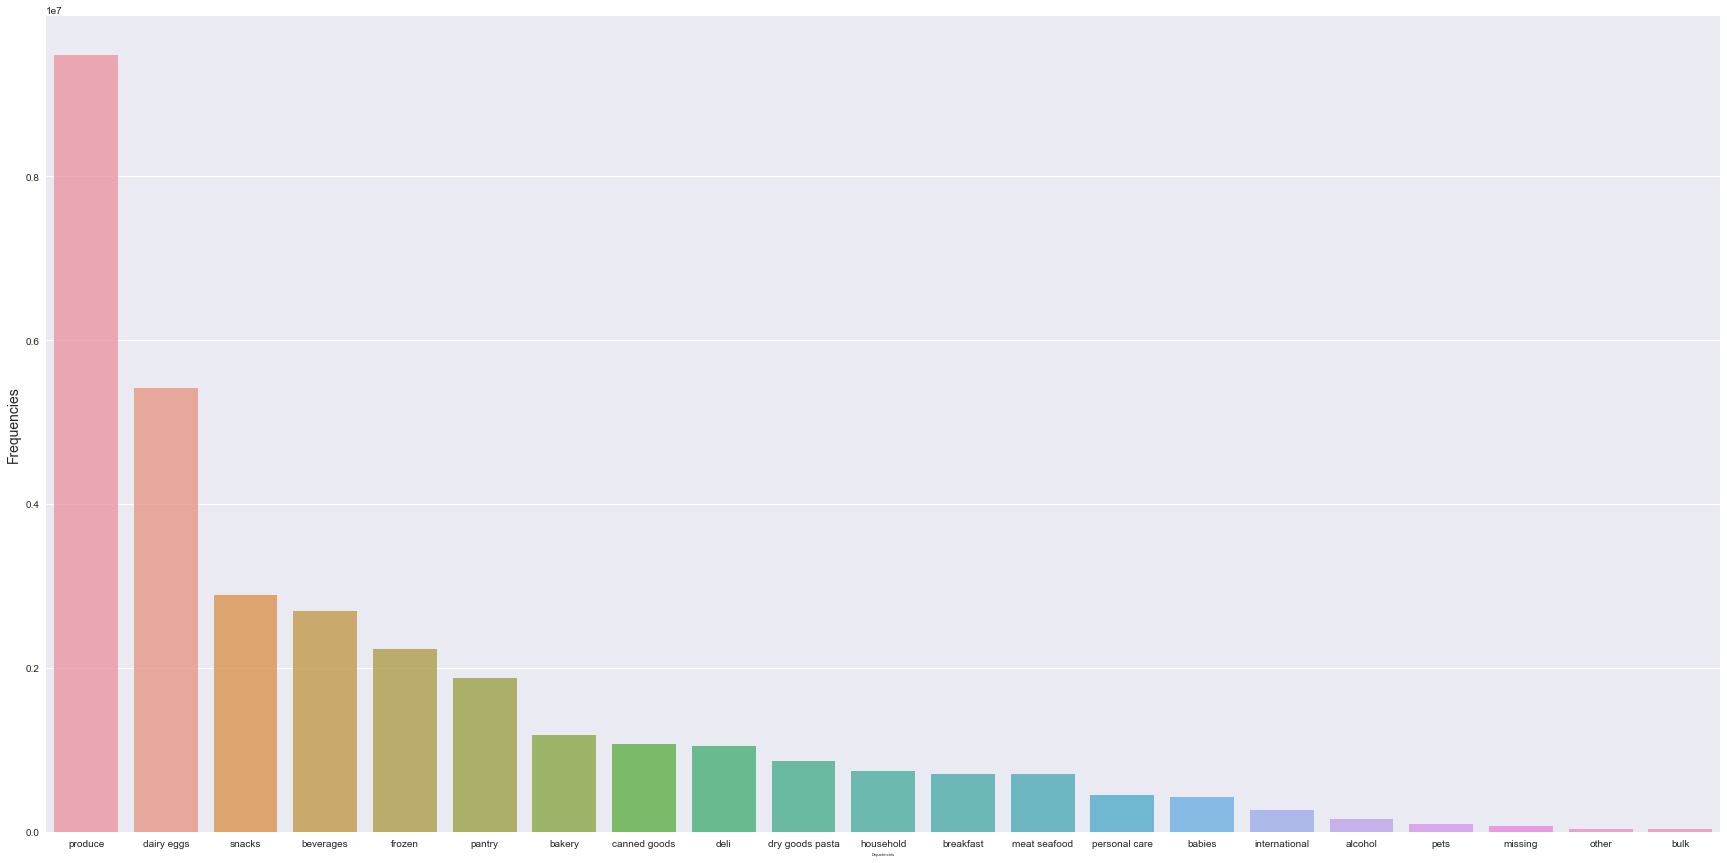

In [77]:
plt.figure(figsize=(30,15))
sns.barplot(count_dept.index, count_dept.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Departments', fontsize=4)
plt.show()

From the graph we can see that the department wise frequency is more for produce which aligns with the aisles frequency and then for dairy eggs.

In [83]:
#merge order_product_prior with orders 
merged_reorders = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
merged_reorders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [85]:
count_reordered = merged_reorders['reordered'].value_counts()
count_reordered

1    19126536
0    13307953
Name: reordered, dtype: int64

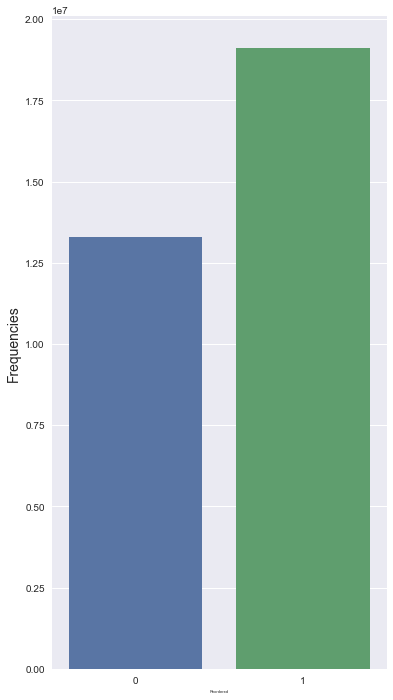

In [89]:
plt.figure(figsize=(6,12))
sns.barplot(count_reordered.index, count_reordered.values)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Reordered', fontsize=4)
plt.show()

In [93]:
#finding reorders against day of the week
grouped_reorders_dow = merged_reorders.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()
grouped_reorders_dow

,order_dow,reordered
0,0,6209666
1,1,5665856
2,2,4217798
3,3,3844117
4,4,3787215
5,5,4209533
6,6,4500304


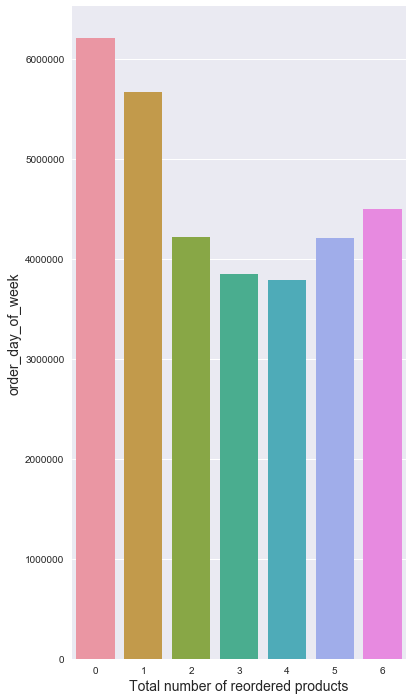

In [107]:
plt.figure(figsize=(6,12))
sns.barplot(grouped_reorders_dow.order_dow, grouped_reorders_dow.reordered)
plt.ylabel('order_day_of_week', fontsize=14)
plt.xlabel('Total number of reordered products', fontsize=14)
plt.show()

From this graph, we can see that most products are reordered on Sunday followed by Monday and Saturday. Which follows the same trend as orders placed over the week.

In [92]:
#finding reorders against hour of the day
grouped_reorders = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
grouped_reorders

,order_hour_of_day,reordered
0,0,218948
1,1,115786
2,2,69434
3,3,51321
4,4,53283
5,5,88062
6,6,290795
7,7,891937
8,8,1719973
9,9,2456713


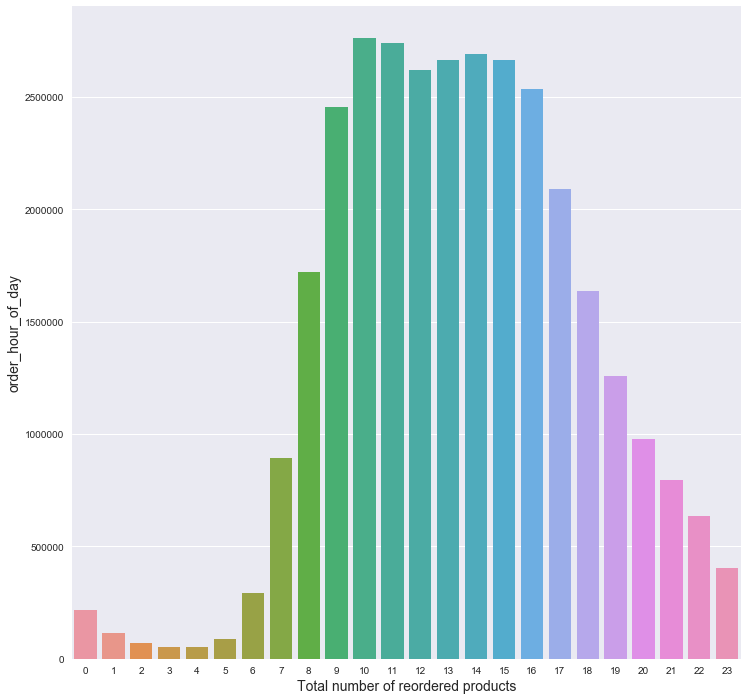

In [108]:
plt.figure(figsize=(12,12))
sns.barplot(grouped_reorders.order_hour_of_day, grouped_reorders.reordered)
plt.ylabel('order_hour_of_day', fontsize=14)
plt.xlabel('Total number of reordered products', fontsize=14)
plt.show()

This graph shows that most products are reordered from 10-11AM followed by 1-3pm. This aligns with the number of products ordered during the week and the weekends.